In [1]:
import sys
sys.path.append('/Users/billystrickland/Documents/code/resonators')
import csv
import matplotlib.pyplot as plt
from shabanipy.labber import LabberData
import numpy as np
import os
from shabanipy.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.jy_mpl_settings.helper import *
from shabanipy.jy_mpl_settings.colors import line_colors
from scipy.optimize import curve_fit
import cmath
import utils.qubit_functions as qf
import matplotlib.patches as patches

plt.style.use(jy_mpl_rc)
root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data/'

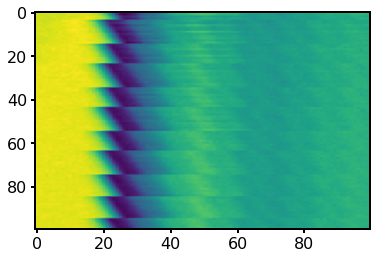

In [2]:
file_num = 143

root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data/'
sample = '4gmon@v10-05-WMSLJB-CD1'
year = '2024'
month = '01'
day = '19'
FILE = f'{root}{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'
I_CH, Q_CH, T_CH, D_CH = ['Digitizer ShabLab - Ch3 - Signal',
              'Digitizer ShabLab - Ch4 - Signal',
              'MQPG - Pulse spacing',
              'SC3 - Drive - Frequency']

with LabberData(FILE) as f:
    I = f.get_data(I_CH)
    Q = f.get_data(Q_CH)
    time = f.get_data(T_CH)
    drive = f.get_data(D_CH)
drive = np.unique(drive)
    
plt.imshow(I[0], aspect = 'auto', cmap = 'viridis')
# I_avg = np.mean(I[:,46:63], axis = 1)
# t1, err = qf.fit_decay(time*1e9, I_avg*1e3, plot_fit=True, voltage=True)
# return t1, err

# plt.imshow(adjusted_data[0], aspect = 'auto')

(100, 41, 73)
A, T, freq, m, b, p =  [-6.42684543e-01  3.80228852e-08  1.14709378e+08  1.37948975e+05
  3.03849077e-03  2.03637429e+00]
measured meter swing =  1.29 deg


Text(-0.2, 1.0, '(b)')

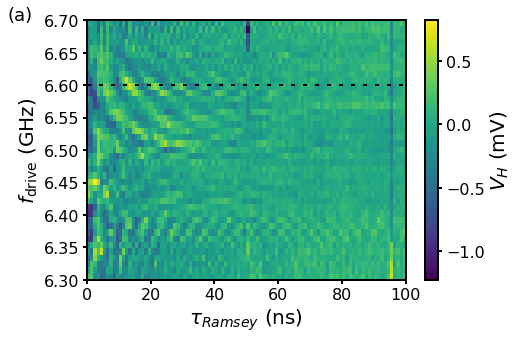

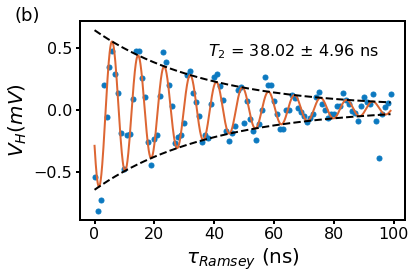

In [4]:
data = I
# Starting indices for each pulse spacing (0 to 99)
starting_indices = {
    0: 25, 1: 25, 2: 26, 3: 26, 4: 21, 5: 21,
    6: 22, 7: 22, 8: 23, 9: 23, 10: 24, 11: 24,
    12: 25, 13: 25, 14: 26, 15: 21, 16: 21, 17: 22,
    18: 22, 19: 23, 20: 23, 21: 24, 22: 24, 23: 25,
    24: 21, 25: 21, 26: 22, 27: 22, 28: 23, 29: 23,
    30: 24, 31: 24, 32: 25, 33: 25, 34: 26, 35: 21,
    36: 22, 37: 22, 38: 23, 39: 23, 40: 24, 41: 24,
    42: 25, 43: 25, 44: 21, 45: 22, 46: 22, 47: 23,
    48: 23, 49: 24, 50: 27, 51: 25, 52: 26, 53: 26,
    54: 27, 55: 21, 56: 22, 57: 22, 58: 23, 59: 23,
    60: 24, 61: 24, 62: 25, 63: 25, 64: 21, 65: 22,
    66: 22, 67: 23, 68: 23, 69: 24, 70: 24, 71: 25,
    72: 25, 73: 26, 74: 26, 75: 21, 76: 22, 77: 22,
    78: 23, 79: 23, 80: 24, 81: 24, 82: 25, 83: 25,
    84: 26, 85: 21, 86: 22, 87: 22, 88: 23, 89: 23,
    90: 24, 91: 24, 92: 25, 93: 25, 94: 26, 95: 26,
    96: 21, 97: 22, 98: 22, 99: 23
}

# Determine the minimum valid readout length
min_readout_length = 100  # Start with the maximum possible length

for pulse_spacing in range(100):
    if pulse_spacing in starting_indices:
        start_index = starting_indices[pulse_spacing]
        readout_length = min(100, data.shape[2] - start_index)
        min_readout_length = min(min_readout_length, readout_length)

# Adjust readout times and truncate to the minimum length
adjusted_data = []

for pulse_spacing in range(100):  # Loop through pulse spacings from 0 to 99
    if pulse_spacing in starting_indices:  # Check if the pulse spacing is valid
        start_index = starting_indices[pulse_spacing]
        # Slice and ensure we truncate to min_readout_length
        adjusted_data.append(data[:, pulse_spacing, start_index:start_index + min_readout_length])

# Convert adjusted_data to a numpy array
adjusted_data = np.array(adjusted_data)

print(np.shape(adjusted_data))
data = np.mean(adjusted_data[:,:,16:20], axis = 2).T[::-1]
data = qf. average_data(data)          

line = -30
plt.subplots(figsize = (7.5, 5))
img = plt.imshow(data*1e3, aspect = 'auto', cmap = 'viridis', interpolation = 'nearest',
          extent= [0, 100,drive[0]*1e-9, drive[-1]*1e-9] )
plt.axhline(y=drive[-line]*1e-9, color = 'k', linestyle = (0, (2, 4)))
plt.xlabel(r'$\tau_{Ramsey}$ (ns)')
plt.ylabel(r'$f_\mathrm{drive}$ (GHz)')
plt.text(-0.25, 1., f'({chr(97 + 0)})', transform=plt.gca().transAxes, 
     fontsize=18)
cbar = plt.colorbar(img)
cbar.set_label('$V_H$ (mV)')
plt.tight_layout()
# plt.savefig(f'/Users/billystrickland/Documents/thesis/{sample}_{file_num}_ramsey_2d.pdf')


# fig, ax = plt.subplots()

qf.fit_rabi_linecut(np.arange(0, 100)*1e-9, data[line]*1e3,
            bounds=[[-1, 10e-9, 0, 1e-9, -360, 0],[1, 100e-9, .35e9, .5e9,360, 2 * np.pi]],
)
plt.xlabel(r'$\tau_{Ramsey}$ (ns)')
plt.ylabel(r'$V_H (mV)$')
plt.text(-0.2, 1., f'({chr(97 + 1)})', transform=plt.gca().transAxes, 
     fontsize=18)
# plt.savefig(f'/Users/billystrickland/Documents/thesis/{sample}_{file_num}_ramsey.pdf')
